In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [57]:
dataframe_csv = pd.read_csv('data-processed/measurements2_clean_withoutna_withdummies.csv')
df = dataframe_csv.copy()

In [58]:
df.sample(10)

,distance,consume,speed,t_in,t_out,gas,ac,rain,sun,gas_dums
61,9.8,5.8,24,21.5,6,SP98,0,0,0,1
317,15.4,4.5,43,22.0,24,E10,0,0,0,0
252,12.4,4.7,55,22.5,14,E10,0,0,1,0
107,16.6,5.1,56,21.0,7,SP98,0,0,0,1
140,12.4,4.3,49,21.5,17,E10,0,0,0,0
72,9.7,3.9,42,21.5,8,SP98,0,0,0,1
257,11.8,4.5,28,22.5,12,E10,0,0,0,0
109,15.9,5.4,25,21.0,7,SP98,0,0,0,1
33,32.6,4.8,40,21.5,7,E10,0,0,0,0
195,19.6,4.9,43,21.5,13,SP98,0,0,0,1


(array([0, 1]), [Text(0, 0, 'E10'), Text(1, 0, 'SP98')])

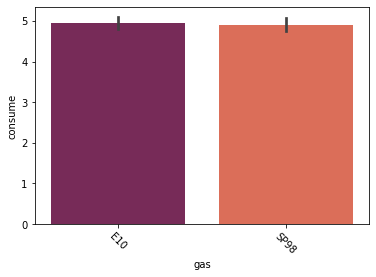

In [59]:
sns.barplot(x='gas',y='consume',data=df,palette="rocket")
plt.xticks(rotation=-45)

(array([0, 1]), [Text(0, 0, 'E10'), Text(1, 0, 'SP98')])

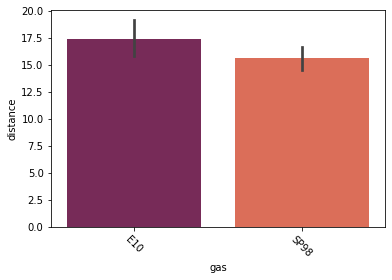

In [60]:
sns.barplot(x='gas',y='distance',data=df,palette="rocket")
plt.xticks(rotation=-45)

In [61]:
df

,distance,consume,speed,t_in,t_out,gas,ac,rain,sun,gas_dums
0,28.0,5.0,26,21.5,12,E10,0,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
372,16.0,3.7,39,24.5,18,SP98,0,0,0,1
373,16.1,4.3,38,25.0,31,SP98,1,0,0,1
374,16.0,3.8,45,25.0,19,SP98,0,0,0,1
375,15.4,4.6,42,25.0,31,SP98,1,0,0,1


In [62]:
df1 = df.drop(columns=['gas'])

In [63]:
X= df1.loc[:, df1.columns != 'consume']
y = df1.consume
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.20, 
    random_state=666)

In [64]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(301, 8)
(76, 8)
(301,)
(76,)


### LINEAR REGRESSION

In [65]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [96]:
train = lr.predict(X_train)
train_mse = mean_squared_error(y_train, train)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train)

test = lr.predict(X_test)
test_mse= mean_squared_error(y_test, test)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test)

In [97]:
print(
"train_mse =", train_mse,"\n",
"train_rmse =", train_rmse,"\n",
"train_r2 =", train_r2, "\n"*2,
"test_mse =", test_mse, "\n",
"test_rmse =", test_rmse, "\n",
"test_r2 =", test_r2, "\n"
)

train_mse = 0.8860302965536877 
 train_rmse = 0.9412918232693237 
 train_r2 = 0.2763500155496572 

 test_mse = 0.4852149614304332 
 test_rmse = 0.696573730074881 
 test_r2 = 0.12395703333931973 



/usr/local/Caskroom/miniconda/base/envs/reto/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/Caskroom/miniconda/base/envs/reto/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


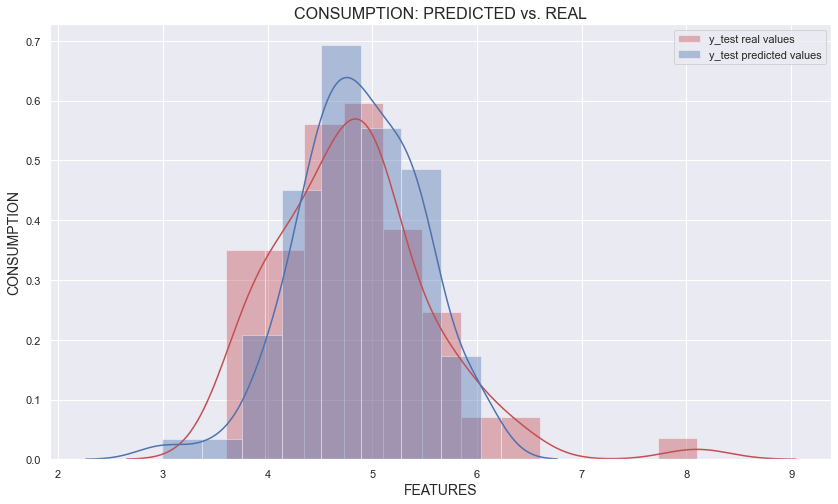

In [91]:
sns.set_context('poster')
sns.set(rc={'figure.figsize': (14, 8)})
sns.set_style('darkgrid')
ax1 = sns.distplot(y_test, color="r", label="y_test real values")
ax2 = sns.distplot(test, color="b", label="y_test predicted values", ax=ax1)
plt.title("CONSUMPTION: PREDICTED vs. REAL", size=16)
plt.xlabel("FEATURES", size=14)
plt.ylabel("CONSUMPTION", size=14)
plt.legend()
plt.show()

### DECISION TREE

In [94]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [98]:
train = tree.predict(X_train)
train_mse = mean_squared_error(y_train, train)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train)

test = tree.predict(X_test)
test_mse= mean_squared_error(y_test, test)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test)

In [99]:
print(
"train_mse =", train_mse,"\n",
"train_rmse =", train_rmse,"\n",
"train_r2 =", train_r2, "\n"*2,
"test_mse =", test_mse, "\n",
"test_rmse =", test_rmse, "\n",
"test_r2 =", test_r2, "\n"
)

train_mse = 0.0020099667774086368 
 train_rmse = 0.04483265302665722 
 train_r2 = 0.9983583942525724 

 test_mse = 0.7048684210526317 
 test_rmse = 0.8395644234081335 
 test_r2 = -0.2726215631603297 



### RANDOM FOREST

In [100]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [101]:
train = rf.predict(X_train)
train_mse = mean_squared_error(y_train, train)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train)

test = rf.predict(X_test)
test_mse= mean_squared_error(y_test, test)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test)

In [102]:
print(
"train_mse =", train_mse,"\n",
"train_rmse =", train_rmse,"\n",
"train_r2 =", train_r2, "\n"*2,
"test_mse =", test_mse, "\n",
"test_rmse =", test_rmse, "\n",
"test_r2 =", test_r2, "\n"
)

train_mse = 0.06957781058462516 
 train_rmse = 0.2637760614320889 
 train_r2 = 0.9431735215562101 

 test_mse = 0.2667885378326022 
 test_rmse = 0.5165157672642745 
 test_r2 = 0.5183202482773259 



### GRADIENT BOOSTING

In [107]:
params1 = {'learning_rate': [0.01, 0.001],
                   'n_estimators': [1000, 3000],
               'max_features': [4],
               'max_depth': [2, 4, 5],
               'min_samples_leaf': [10, 20]
          }
gb = GradientBoostingRegressor()
gs = GridSearchCV(
    gb,
    param_grid =params1,
    verbose = 1)

gs.fit(X_train, y_train)



Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.001], 'max_depth': [2, 4, 5],
                         'max_features': [4], 'min_samples_leaf': [10, 20],
                         'n_estimators': [1000, 3000]},
             verbose=1)

In [109]:
best = gs.best_estimator_

y_pred = best.predict(X_test) 
score = mean_squared_error(y_test, y_pred)
best_params = (gs.best_params_)

In [111]:
print(
'score = ',score, '\n'*2,
'best_params = ','\n', best_params,'\n')

score =  0.26922145881489695 

 best_params =  
 {'learning_rate': 0.01, 'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 20, 'n_estimators': 1000} 

